In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\sivar\Desktop\vicks\region-traffic-by-road-type.xls")

print(df.columns)

Index(['year', 'region_id', 'Region_name', 'ons_code', 'road_category_id',
       'road_category_name', 'total_link_length_km', 'total_link_length_miles',
       'all_motor_vehicles'],
      dtype='object')


In [4]:
def plot_region_traffic_by_year(data):
    """
    Plot the trend in total number of all motor vehicles in each region by year.
    
    Parameters:
        data (str): the path to the csv file containing the data.
    
    Returns:
        None
    """
   
    # Group the data by year and region, and calculate the sum of all_motor_vehicles
    df_grouped = df.groupby(['year', 'Region_name'])['all_motor_vehicles'].sum().reset_index()
    
    # Create a list of unique regions
    regions = df_grouped['Region_name'].unique()
    
    # Plot each region's data on the same plot
    for region in regions:
        region_data = df_grouped[df_grouped['Region_name'] == region]
        plt.plot(region_data['year'], region_data['all_motor_vehicles'], label=region)
    
    # Set the plot title and axis labels
    plt.title('Total Number of All Motor Vehicles by Region and Year')
    plt.xlabel('Year')
    plt.ylabel('Total Number of All Motor Vehicles')
    
    # Add a legend to the plot
    plt.legend()
    
    # Display the plot
    plt.show()

In [5]:
def heatmap_traffic_by_region(data):
    """
    Generate a heatmap showing the total number of all motor vehicles by region and year.
    
    Parameters:
        data (str): the path to the csv file containing the data.
    
    Returns:
        None
    """
    
    # Group the data by region and year, and calculate the sum of all_motor_vehicles
    df_grouped = df.groupby(['Region_name', 'year'])['all_motor_vehicles'].sum().reset_index()
    
    # Pivot the data to create a matrix with region_name as the rows, year as the columns, and all_motor_vehicles as the values
    df_pivot = df_grouped.pivot(index='Region_name', columns='year', values='all_motor_vehicles')
    
    # Create a heatmap of the data
    sns.heatmap(df_pivot, cmap='Blues')
    
    # Set the plot title and axis labels
    plt.title('Total Number of All Motor Vehicles by Region and Year')
    plt.xlabel('Year')
    plt.ylabel('Region')
    
    # Display the plot
    plt.show()

In [6]:
def boxplot_traffic_by_region(data):
    """
    Generate a box plot showing the distribution of total number of all motor vehicles by region.
    
    Parameters:
        data (str): the path to the csv file containing the data.
    
    Returns:
        None
    """
   
    # Create a box plot of the data
    sns.boxplot(x='Region_name', y='all_motor_vehicles', data=df)
    
    # Rotate the x-axis labels by 90 degrees
    plt.xticks(rotation=90)
    
    # Set the plot title and axis labels
    plt.title('Dist of Total Number of All Motor Vehicles by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Number of All Motor Vehicles')
    
    # Display the plot
    plt.show()

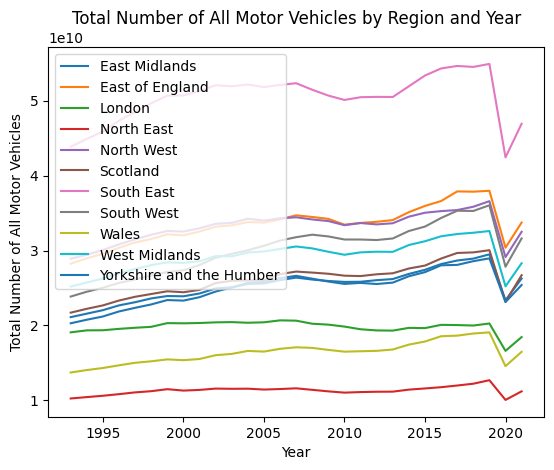

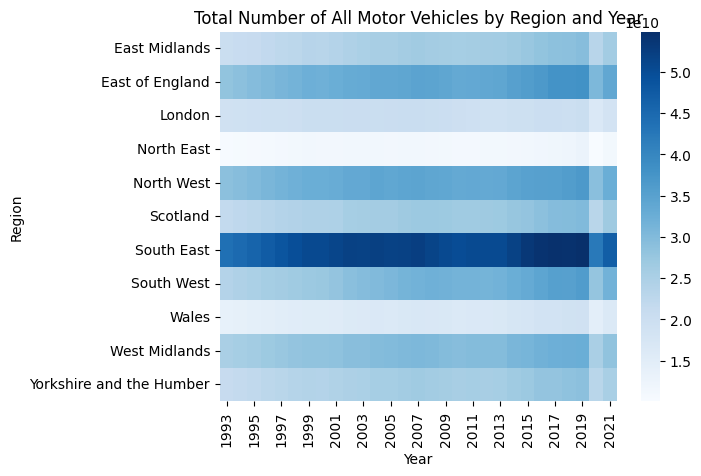

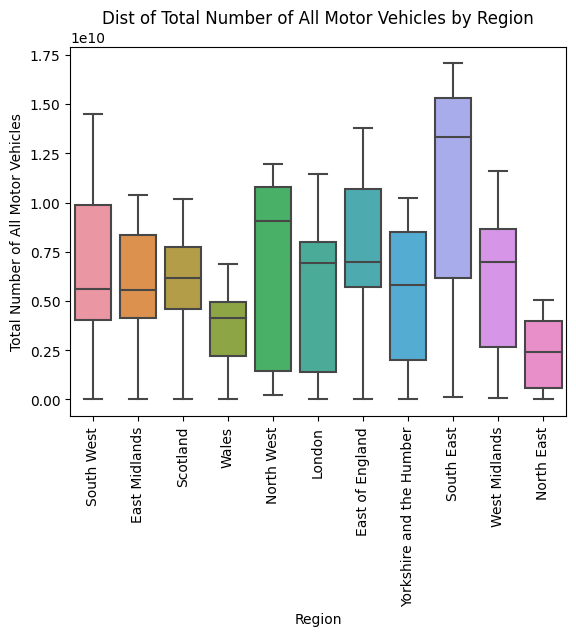

In [7]:
plot_region_traffic_by_year('region_traffic_by_road_type.csv')
heatmap_traffic_by_region('region_traffic_by_road_type.csv')
boxplot_traffic_by_region('region_traffic_by_road_type.csv')